<a href="https://colab.research.google.com/github/cristian14296/ML-Applications_Actuarial_Sciences/blob/main/CA_Nov_2023_CHAIN_LADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data understanding**

En esta etapa del problema, se busca examinar la base de datos con la que se está trabajando, analizando las variables y datos disponibles para el modelo que deseamos desarrollar. Este modelo tiene como objetivo abordar y resolver los desafíos específicos que la empresa enfrenta.


In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install chainladder
import chainladder as cl
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00


Se establece en el entorno de trabajo

Se cargan los datos en el entorno de trabajo

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/medmal_pos.csv")
df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558
1,669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558
2,669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558
3,669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558
4,669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,44504,California Healthcare Ins Co Inc,1997,2002,6,3970,3971,-1,9711,5704,4007,1,15719
3396,44504,California Healthcare Ins Co Inc,1997,2003,7,3965,3965,0,9711,5704,4007,1,15719
3397,44504,California Healthcare Ins Co Inc,1997,2004,8,3965,3965,0,9711,5704,4007,1,15719
3398,44504,California Healthcare Ins Co Inc,1997,2005,9,3965,3965,0,9711,5704,4007,1,15719


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lo primero es determinar la base de datos con la que estamos trabajando. La fuente de datos proviene de la Casualty Actuarial Society (CAS), disponible en la sección https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p. Esta base de datos contiene información sobre siniestros en los principales ramos personales y comerciales de todas las aseguradoras de daños materiales que operan en Estados Unidos. Es importante destacar que estos archivos son de acceso público y no tienen restricciones de uso. El formato de la base está completo y no presenta problemas en el tratamiento de los datos. Para este proyecto, nos enfocaremos exclusivamente en la información relacionada con Negligencia Médica y las reclamaciones asociadas. A continuación, realizaremos un análisis descriptivo básico de las columnas disponibles en esta porción específica de la base de datos

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GRCODE              3400 non-null   int64 
 1   GRNAME              3400 non-null   object
 2   AccidentYear        3400 non-null   int64 
 3   DevelopmentYear     3400 non-null   int64 
 4   DevelopmentLag      3400 non-null   int64 
 5   IncurLoss_F2        3400 non-null   int64 
 6   CumPaidLoss_F2      3400 non-null   int64 
 7   BulkLoss_F2         3400 non-null   int64 
 8   EarnedPremDIR_F2    3400 non-null   int64 
 9   EarnedPremCeded_F2  3400 non-null   int64 
 10  EarnedPremNet_F2    3400 non-null   int64 
 11  Single              3400 non-null   int64 
 12  PostedReserve97_F2  3400 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 345.4+ KB


La información anterior revela que la base de datos consta de 13 variables, todas las cuales cuentan con datos completos y no presentan valores faltantes (NA's). Por lo tanto, no enfrentaríamos problemas significativos al trabajar con la base, ya que no sería necesario realizar una limpieza exhaustiva de los datos. En cambio, simplemente deberíamos definir qué variables son más relevantes o deseables para nuestro análisis y trabajo posterior.


# **Entendiendo los datos que tiene la base de Datos**

Gracias por proporcionar las variables de la base de datos. Aquí tienes una breve descripción de cada una:

    GRCODE: Código de empresa, que incluye grupos de aseguradores y aseguradores individuales.

    GRNAME: Nombre de la empresa, que incluye grupos de aseguradores y aseguradores individuales.

    AccidentYear: Año del accidente, que abarca desde 1988 hasta 1997.

    DevelopmentYear: Año de desarrollo o de pago.

    DevelopmentLag: Cantidad de años que tardó en realizarse el pago.

    IncurLoss_F2: Pérdidas y gastos asignados reportados al final del año.

    CumPaidLoss_F2: Pérdidas pagadas acumuladas y gastos asignados al final del año.

    BulkLoss_F2: Reservas y IBNR (Incurridas pero no reportadas) sobre pérdidas netas y gastos de defensa y contención de costos reportados al final del año.

    EarnedPremDIR_F2: Primas devengadas en el año incurrido: directas y asumidas.

    EarnedPremCeded_F2: Primas devengadas en el año incurrido - cedidas.

    EarnedPremNet_F2: Primas devengadas en el año en que se incurrió - netas.

    Single: 1 indica una sola entidad, 0 indica una aseguradora grupal.

    PostedReserve97_F2: Reservas contabilizadas en el año 1997 tomadas del Anexo de Suscripción e Inversiones.

In [ ]:
df.describe()


,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,22809.764706,1992.500000,1997.000000,5.500000,11609.344412,6706.067059,1095.803235,14111.605882,1803.497059,12308.108824,0.852941,57065.529412
std,14708.377001,2.872704,4.062617,2.872704,26802.819463,17121.815066,7612.672277,26399.284476,3893.424584,24824.225795,0.354217,134355.533990
min,669.000000,1988.000000,1988.000000,1.000000,-17.000000,-1190.000000,-32101.000000,-781.000000,-6214.000000,-728.000000,0.000000,0.000000
25%,10341.000000,1990.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,629.000000
50%,19764.000000,1992.500000,1997.000000,5.500000,645.000000,187.000000,0.000000,1500.000000,106.500000,1302.000000,1.000000,5875.000000
75%,36234.000000,1995.000000,2000.000000,8.000000,9050.500000,4385.500000,107.250000,18094.500000,1473.500000,13490.000000,1.000000,46762.000000
max,44504.000000,1997.000000,2006.000000,10.000000,179425.000000,113189.000000,104402.000000,131948.000000,25553.000000,135318.000000,1.000000,702246.000000


Con función boxplot se revisa si hay outliers

Axes(0.125,0.11;0.775x0.77)


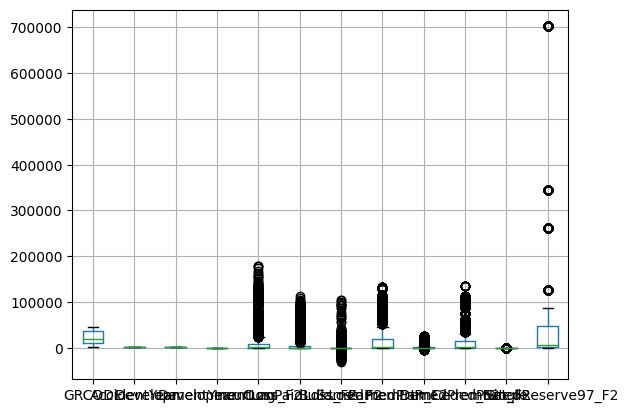

In [ ]:
print(df.boxplot())

Con función corr, se revisa multicolinealidad

In [ ]:
print(df.corr())

                          GRCODE  AccidentYear  DevelopmentYear  \
GRCODE              1.000000e+00  7.665625e-14    -1.304826e-13   
AccidentYear        7.665625e-14  1.000000e+00     7.071068e-01   
DevelopmentYear    -1.304826e-13  7.071068e-01     1.000000e+00   
DevelopmentLag     -2.127303e-15  1.775597e-15     7.071068e-01   
IncurLoss_F2        3.709522e-02  7.041574e-02     1.123293e-02   
CumPaidLoss_F2     -3.274058e-02  9.463845e-02     1.828621e-01   
BulkLoss_F2        -1.018426e-01 -4.494997e-02    -1.836975e-01   
EarnedPremDIR_F2    4.661804e-02  4.216493e-02     2.981511e-02   
EarnedPremCeded_F2  1.485769e-01  7.364024e-02     5.207152e-02   
EarnedPremNet_F2    2.627312e-02  3.329052e-02     2.353995e-02   
Single              5.793551e-01  2.353336e-13    -2.890495e-14   
PostedReserve97_F2  1.473483e-01 -7.882656e-14    -6.406502e-14   

                    DevelopmentLag  IncurLoss_F2  CumPaidLoss_F2  BulkLoss_F2  \
GRCODE               -2.127303e-15      0.03709

<ipython-input-8-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Con función de conteo, se revisa cantidad de aseguradoras

In [ ]:
conteo = df['GRNAME'].value_counts()
conteo

Scpie Indemnity Co                    100
Preferred Professional Ins Co         100
Nichido Fire & Marine Ins Co Ltd      100
Texas Hospital Ins Exch               100
State Volunteer Mut Ins Co            100
MHA Ins Co                            100
Health Care Ind Inc                   100
National Guardian RRG Inc             100
Medical Mut Ins Co Of ME              100
Promutual Grp                         100
Utah Medical Ins Assoc                100
Seguros Triples Inc                   100
Dentists Ins Co                       100
Physicians Recip Insurers             100
Louisiana Med Mut Ins Co              100
Clinic Mut Ins Co RRG                 100
Michigan Professional Ins Exch        100
National American Ins Co              100
NCMIC Ins Co                          100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG           

In [ ]:
df_ordenado = df.sort_values(by='GRNAME', ascending=False)
df_ordenado
np.histogram

<function numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)>

Realizamos un análisis descriptivo básico de las variables en la base de datos, abordando aspectos como la cantidad de variables presentes, la media de los datos de cada variable, las desviaciones estándar, entre otros.

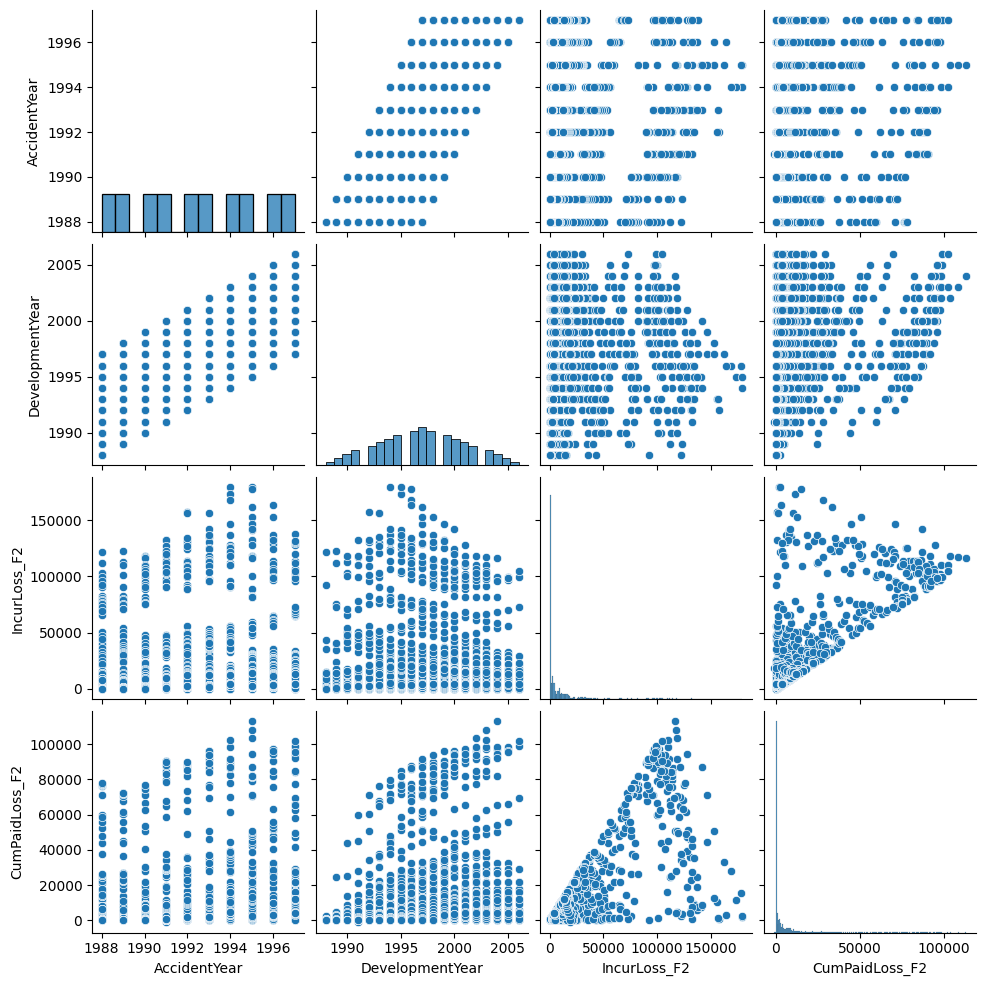

In [ ]:
# Data visualization
sns.pairplot(df[['AccidentYear', 'DevelopmentYear', 'IncurLoss_F2', 'CumPaidLoss_F2']])
plt.show()

Finalmente, se desea examinar las correlaciones presentes en los datos de la base de datos

<ipython-input-12-b81e32e74a33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


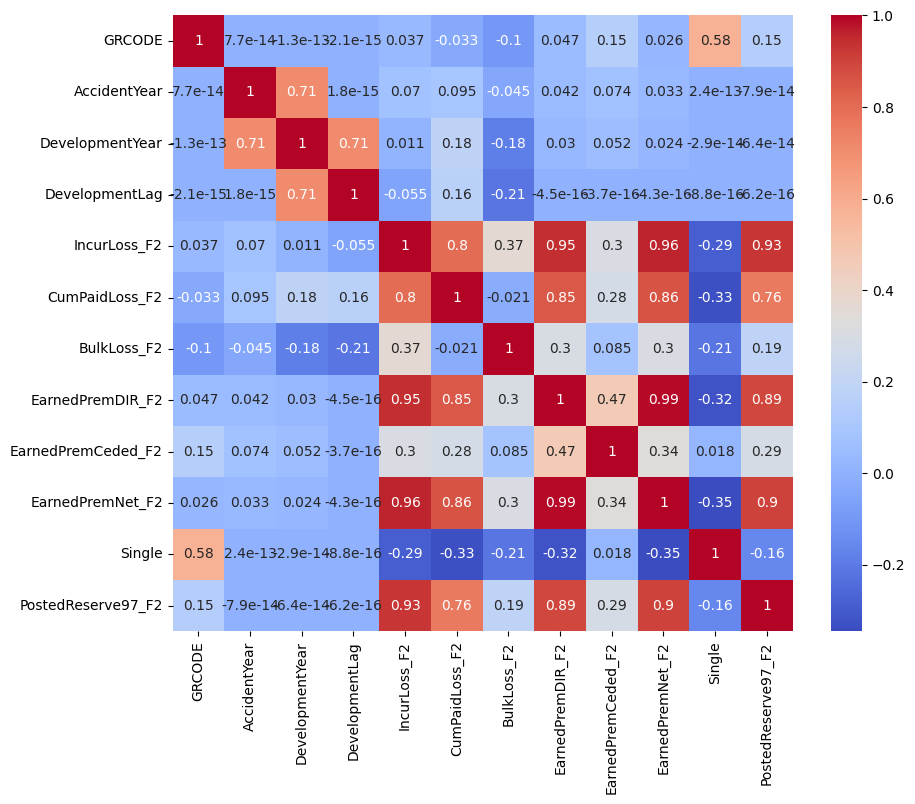

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Examinar las gráficas de las distribuciones de variables de interés relacionadas con los pagos de la empresa y las primas

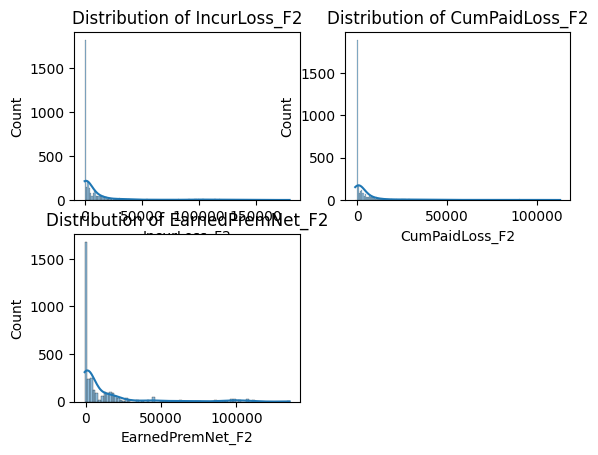

In [ ]:
columns_to_plot = ['IncurLoss_F2', 'CumPaidLoss_F2', 'EarnedPremNet_F2']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')


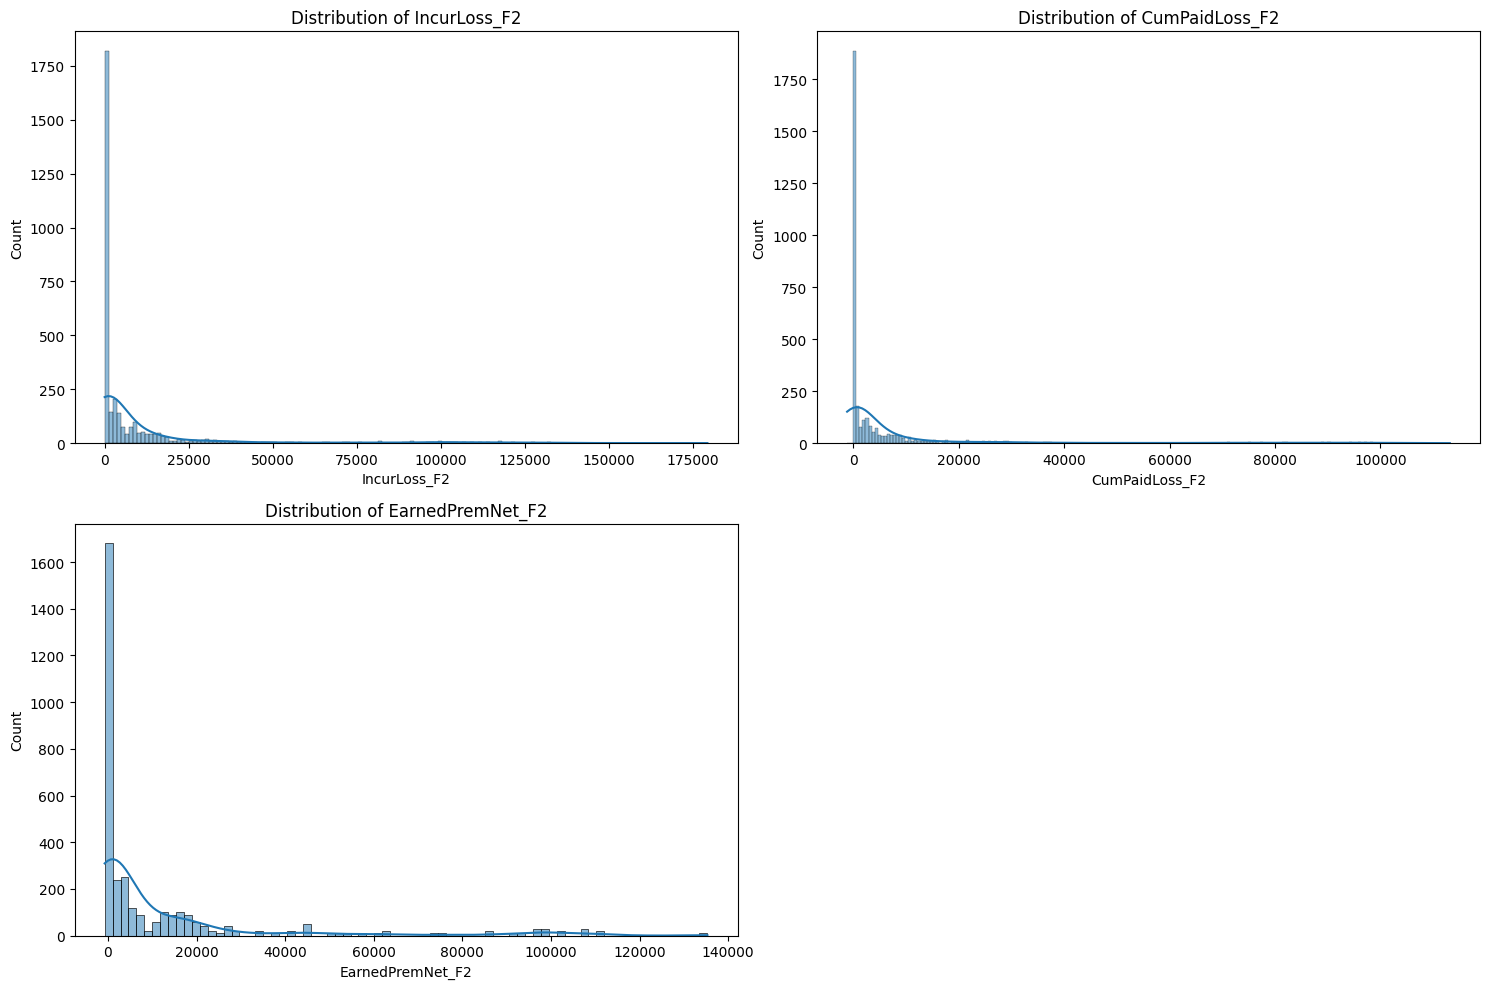

Variance of each column:
GRCODE                2.163364e+08
AccidentYear          8.252427e+00
DevelopmentYear       1.650485e+01
DevelopmentLag        8.252427e+00
IncurLoss_F2          7.183911e+08
CumPaidLoss_F2        2.931566e+08
BulkLoss_F2           5.795278e+07
EarnedPremDIR_F2      6.969222e+08
EarnedPremCeded_F2    1.515875e+07
EarnedPremNet_F2      6.162422e+08
Single                1.254694e-01
PostedReserve97_F2    1.805141e+10
dtype: float64
Columns with low variance:
Index([], dtype='object')


<ipython-input-14-310b0f35aa0b>:15: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


In [ ]:
# Analysis of Distributions
plt.figure(figsize=(15, 10))

# Plot histograms for selected columns
columns_to_plot = ['IncurLoss_F2', 'CumPaidLoss_F2', 'EarnedPremNet_F2']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Variance Calculation
variance = df.var()
print('Variance of each column:')
print(variance)

# If you want to filter out columns with low variance (e.g., close to zero), you can do:
low_variance_columns = variance[variance < 0.01].index
print('Columns with low variance:')
print(low_variance_columns)

# If you want to drop columns with low variance from the DataFrame:
data = df.drop(low_variance_columns, axis=1)

Considerando nuestro objetivo de realizar un trabajo para estimar mediante el método Chain Ladder (un enfoque estadístico utilizado para calcular la provisión de prestaciones, basado en el análisis de triángulos de siniestros), es importante señalar que los triángulos de siniestros representan una distribución bidimensional de información histórica de siniestralidad. Generalmente, las dos dimensiones son el año de ocurrencia (eje vertical) y el año de pago (eje horizontal).

Sin embargo, para lograr esto, es esencial tener en cuenta que el modelo debe construirse con una cantidad específica de datos, reservando otros para evaluar y probar la generalización del modelo con datos externos a la muestra inicial. Por lo tanto, el primer paso consistirá en reservar los datos de una compañía para las pruebas del modelo, mientras que el resto se utilizarán para el entrenamiento del mismo.

In [ ]:
df_train = df.head(3300).copy()
df_train['GRNAME'].value_counts()

Scpie Indemnity Co                    100
National American Ins Co              100
Louisiana Med Mut Ins Co              100
Physicians Recip Insurers             100
Dentists Ins Co                       100
Seguros Triples Inc                   100
Utah Medical Ins Assoc                100
Medical Mut Ins Co Of ME              100
Preferred Professional Ins Co         100
National Guardian RRG Inc             100
Health Care Ind Inc                   100
MHA Ins Co                            100
State Volunteer Mut Ins Co            100
Texas Hospital Ins Exch               100
Nichido Fire & Marine Ins Co Ltd      100
Michigan Professional Ins Exch        100
NCMIC Ins Co                          100
Promutual Grp                         100
Underwriters At Lloyds London         100
Community Blood Cntr Exch RRG         100
Campmed Cas & Ind Co Inc MD           100
Homestead Ins Co                      100
Franklin Cas Ins Co RRG               100
MCIC VT Inc RRG                   

Se va a seleccionar las filas y columnas para utilizar

In [ ]:
df.columns

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2',
       'EarnedPremCeded_F2', 'EarnedPremNet_F2', 'Single',
       'PostedReserve97_F2'],
      dtype='object')

In [ ]:
df_col_seleccionado = df.columns[0:6]
df_col_seleccionado

Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_F2'],
      dtype='object')

Retirar de la muestra las entidades que presenten ceros en sus datos para evitar sesgarla.


In [ ]:
Lista_entidades_ceros = df[df[df_col_seleccionado[5]] <= 0]["GRCODE"].unique()
df_filtrado = df[~df["GRCODE"].isin(Lista_entidades_ceros)]
df_filtrado[df_filtrado[df_col_seleccionado[5]] <= 0]["GRCODE"].unique() #Verificación debe estar en vacío
df_filtrado = df_filtrado[df_col_seleccionado]
print("cantidad de aseguradoras buenas:", len(df_filtrado["GRCODE"].unique()))

cantidad de aseguradoras buenas: 14


Retirar de la muestra las entidades que presenten ceros en sus datos para evitar sesgar la muestra.


# **Deterministic Chain Ladder**



In [ ]:
class ChainLadder:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = ""):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK

    def Triangulos(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        diccionario_todos_triangulos = {}

        for k in datos["GRCODE"].unique():

            Filtro_datos = datos[datos["GRCODE"] == k]

            Triangulo_full = Filtro_datos.pivot_table(values = "IncurLoss_C", index = "AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)

            Triangulo_full_acumulado = Triangulo_full.copy()

            num_filas = Triangulo_full_acumulado.shape[0]
            num_columnas = Triangulo_full_acumulado.shape[1]

            Triangulo_full_mitad = Triangulo_full.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_full_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            for indice, i in enumerate(range(1,num_columnas+1)):
                Triangulo_full_acumulado[Triangulo_full.columns[indice]] = Triangulo_full[Triangulo_full.columns[0:i]].sum(axis = 1)

            Triangulo_acumulado_mitad = Triangulo_full_acumulado.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_acumulado_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            factores0 = Triangulo_acumulado_mitad.sum(axis = 0) # Rojo
            factores1 = Triangulo_acumulado_mitad.sum(axis = 0)-np.flip(np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)) # Azul
            factores0 = factores0[1:10]
            factores1 = factores1[0:-1]
            factores = factores0.reset_index(drop = True) / factores1.reset_index(drop = True)

            Triangulo_estimado = Triangulo_acumulado_mitad.copy()
            for i in list(reversed(range(num_filas))):
                comodin = np.diag(np.fliplr(Triangulo_acumulado_mitad), 0)[i]
                for j in range(1,i+1):
                    Triangulo_estimado.iloc[i, -j] = comodin*factores.iloc[-i+9:-j+10].prod()   # Puedes establecerlo en None u otro valor si lo prefieres



            reserva_total = sum(np.array(list(reversed(np.array(Triangulo_estimado[10]))))-np.flip(np.diag(np.fliplr(Triangulo_estimado), 0)))

            diciconario_triangulo = {'Triangulo_full':Triangulo_full, "Triangulo_full_mitad":Triangulo_full_mitad, "Triangulo_full_acumulado":Triangulo_full_acumulado,
                                     "Triangulo_acumulado_mitad":Triangulo_acumulado_mitad, "factores":factores, "Triangulo_estimado":Triangulo_estimado,
                                     "reserva_total":reserva_total}

            nombre = k
            diccionario_todos_triangulos[nombre] = diciconario_triangulo

        return diccionario_todos_triangulos



In [ ]:
class ChainLadder_corto:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = ""):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK

    def Triangulos(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        diccionario_todos_triangulos = {}

        for k in datos["GRCODE"].unique():

            Filtro_datos = datos[datos["GRCODE"] == k]

            Triangulo_full = Filtro_datos.pivot_table(values = "IncurLoss_C", index = "AccidentYear", columns='DevelopmentLag', aggfunc="sum", margins=False)

            Triangulo_full_acumulado = Triangulo_full.copy()

            num_filas = Triangulo_full_acumulado.shape[0]
            num_columnas = Triangulo_full_acumulado.shape[1]

            Triangulo_full_mitad = Triangulo_full.copy()
            for i in range(num_filas):
                for j in range(1,i+1):
                    Triangulo_full_mitad.iloc[i, -j] = None  # Puedes establecerlo en None u otro valor si lo prefieres

            diciconario_triangulo = {'Triangulo_full':Triangulo_full, "Triangulo_full_mitad":Triangulo_full_mitad}

            nombre = k
            diccionario_todos_triangulos[nombre] = diciconario_triangulo

        return diccionario_todos_triangulos

Validar los códigos de las compañías que aún están presentes en la base de datos

In [ ]:
code_aseguradora = df_filtrado["GRCODE"].unique()[0]
print("Se realizará un ejemplo con la aseguradora:", code_aseguradora)

Se realizará un ejemplo con la aseguradora: 669


In [ ]:
#Aplicación de la clase que cálcula el método deterministico
resultados = ChainLadder(tabla = df_filtrado, origin = "AccidentYear", development = "DevelopmentLag", columns = df_filtrado.columns[5], index = "GRCODE")
triangulos_resultados = resultados.Triangulos()

In [ ]:
print("Resultados para la aseguradora: ", code_aseguradora)
triangulos_resultados[code_aseguradora]["Triangulo_full"] #Triangulo con los datos del dataframe

Resultados para la aseguradora:  669


DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,121905,112211,103226,99599,96006,90487,82640,80406,78920,78511
1989,122679,113165,110037,101142,90817,81919,77491,73577,72716,72317
1990,118157,117497,116377,99895,89252,81916,79134,76333,75612,75350
1991,117981,122443,121056,113795,102830,98071,94870,91062,90493,90345
1992,131059,130155,124195,113974,106817,99182,92588,91000,89256,89251
1993,134700,130757,125253,114717,111294,98014,96872,95714,96017,96047
1994,136749,128192,121355,111877,96152,91502,90498,91870,91848,91938
1995,140962,132405,118332,100050,88809,82360,81986,81887,81796,81782
1996,134473,128980,113645,104273,99276,97782,97282,97738,97601,97251


In [ ]:
triangulos_resultados[code_aseguradora]["Triangulo_full_mitad"] #Triangulo con los datos del dataframe pero superior

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,121905,112211.0,103226.0,99599.0,96006.0,90487.0,82640.0,80406.0,78920.0,78511.0
1989,122679,113165.0,110037.0,101142.0,90817.0,81919.0,77491.0,73577.0,72716.0,NaN
1990,118157,117497.0,116377.0,99895.0,89252.0,81916.0,79134.0,76333.0,NaN,NaN
1991,117981,122443.0,121056.0,113795.0,102830.0,98071.0,94870.0,NaN,NaN,NaN
1992,131059,130155.0,124195.0,113974.0,106817.0,99182.0,NaN,NaN,NaN,NaN
1993,134700,130757.0,125253.0,114717.0,111294.0,NaN,NaN,NaN,NaN,NaN
1994,136749,128192.0,121355.0,111877.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,140962,132405.0,118332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,134473,128980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
triangulos_resultados[code_aseguradora]["Triangulo_full_acumulado"] #Triangulo acumulado completo

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,121905,234116,337342,436941,532947,623434,706074,786480,865400,943911
1989,122679,235844,345881,447023,537840,619759,697250,770827,843543,915860
1990,118157,235654,352031,451926,541178,623094,702228,778561,854173,929523
1991,117981,240424,361480,475275,578105,676176,771046,862108,952601,1042946
1992,131059,261214,385409,499383,606200,705382,797970,888970,978226,1067477
1993,134700,265457,390710,505427,616721,714735,811607,907321,1003338,1099385
1994,136749,264941,386296,498173,594325,685827,776325,868195,960043,1051981
1995,140962,273367,391699,491749,580558,662918,744904,826791,908587,990369
1996,134473,263453,377098,481371,580647,678429,775711,873449,971050,1068301


In [ ]:
triangulos_resultados[code_aseguradora]["Triangulo_full_mitad"] #Triangulo acumulado solo mitad superior

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,121905,112211.0,103226.0,99599.0,96006.0,90487.0,82640.0,80406.0,78920.0,78511.0
1989,122679,113165.0,110037.0,101142.0,90817.0,81919.0,77491.0,73577.0,72716.0,NaN
1990,118157,117497.0,116377.0,99895.0,89252.0,81916.0,79134.0,76333.0,NaN,NaN
1991,117981,122443.0,121056.0,113795.0,102830.0,98071.0,94870.0,NaN,NaN,NaN
1992,131059,130155.0,124195.0,113974.0,106817.0,99182.0,NaN,NaN,NaN,NaN
1993,134700,130757.0,125253.0,114717.0,111294.0,NaN,NaN,NaN,NaN,NaN
1994,136749,128192.0,121355.0,111877.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,140962,132405.0,118332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,134473,128980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
triangulos_resultados[code_aseguradora]["factores"] #Factores para hacer la estimación por Chain-Ladder

0    1.963009
1    1.467341
2    1.295020
3    1.212010
4    1.161492
5    1.131422
6    1.109385
7    1.097371
8    1.090722
dtype: float64

In [ ]:
triangulos_resultados[code_aseguradora]["Triangulo_estimado"] #Triangulo estimado completo respecto al acumulado

DevelopmentLag,1,2,3,4,5,6,7,8,9,10
AccidentYear,,,,,,,,,,
1988,121905,234116.00000,337342.000000,436941.000000,532947.000000,623434.000000,706074.000000,786480.000000,865400.000000,9.439110e+05
1989,122679,235844.00000,345881.000000,447023.000000,537840.000000,619759.000000,697250.000000,770827.000000,843543.000000,9.200711e+05
1990,118157,235654.00000,352031.000000,451926.000000,541178.000000,623094.000000,702228.000000,778561.000000,854369.993215,9.318803e+05
1991,117981,240424.00000,361480.000000,475275.000000,578105.000000,676176.000000,771046.000000,855386.937928,938676.522910,1.023835e+06
1992,131059,261214.00000,385409.000000,499383.000000,606200.000000,705382.000000,798084.554401,885383.107099,971593.438671,1.059739e+06
1993,134700,265457.00000,390710.000000,505427.000000,616721.000000,716316.455938,810456.035945,899107.844295,986654.562494,1.076166e+06
1994,136749,264941.00000,386296.000000,498173.000000,603790.859451,701298.202217,793464.056665,880257.195792,965968.414031,1.053603e+06
1995,140962,273367.00000,391699.000000,507257.864803,614801.810119,714087.332406,807933.957043,896309.887559,983584.166882,1.072817e+06
1996,134473,263453.00000,386575.428325,500622.739291,606759.968961,704746.798910,797365.874057,884585.813839,970718.512445,1.058784e+06


In [ ]:
triangulos_resultados[code_aseguradora]["reserva_total"] #reserva total que debe tener la aseguradora

4278625.832135844

# **Modelacion de Regresion Lineal, Ridge y Lasso**



In [ ]:
datos = df_filtrado
size = triangulos_resultados[datos["GRCODE"].unique()[0]]["Triangulo_acumulado_mitad"].shape[0]#10
size1 =  size**2 #100
size2 = (size1-size)/2 + size #55
cant_parametros = size*2-1 #19
matriz_de_ceros = np.zeros((size1, cant_parametros)) #matriz de ceros
matriz_de_ceros[:,0] = 1 #columna 0 se llene de unos
for i in range(size): #recorre las columnas
    for j in range(size): #recorre las filas
        k = i*10+j
        if i != 0:
            matriz_de_ceros[k,i] = 1
        if j != 0:
            matriz_de_ceros[k,j+9] = 1
matriz_de_ceros = pd.DataFrame(matriz_de_ceros)

In [ ]:
class Reserva_Regresion_lineal:
    def __init__(self, tabla = pd.DataFrame(), origin = "", development = "", columns = "", index = "", alpha = 1, matriz_de_ceros = pd.DataFrame()):

        self.tabla = tabla #OK
        self.origin = origin #OK
        self.development = development #OK
        self.index = index #OK
        self.columns = columns #OK
        self.alpha = alpha #OK
        self.matriz_de_ceros = matriz_de_ceros #OK


    def Regresion_lineal(self):

        # Renombrar las columnas
        datos = self.tabla.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})
        inicio = time.time()
        resultados = ChainLadder_corto(tabla = datos, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")
        triangulos_resultados = resultados.Triangulos()
        fin = time.time()
        #print(fin-inicio)

        #triangulos_resultados

        inicio = time.time()
        Y = pd.DataFrame()
        Y_completo = pd.DataFrame()
        matriz_X = pd.DataFrame()
        for i in datos["GRCODE"].unique():#[3492]:#
            triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
            triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
            triangulo_log =  np.log(triangulo)
            triangulo_completo_log = np.log(triangulo_completo)
            vector_Y = pd.melt(triangulo_log)
            vector_Y_completo = pd.melt(triangulo_completo_log)
            vector_Y["GRCODE"] = i
            Y = pd.concat([Y,vector_Y], axis = 0)
            Y_completo = pd.concat([Y_completo,vector_Y_completo], axis = 0)
            matriz_X = pd.concat([matriz_X, self.matriz_de_ceros], axis = 0)

        fin = time.time()
        #print(fin-inicio)

        inicio = time.time()

        matriz_X = matriz_X.reset_index(drop=True)
        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        matriz_regresion = pd.concat([Y[["value", "GRCODE"]], Y_completo, matriz_X], axis = 1)
        matriz_regresion = matriz_regresion.reset_index(drop=True)
        matriz_regresion1 = matriz_regresion[~matriz_regresion["value"].isnull()]
        matriz_regresion1.columns = ['Z', "GRCODE", "Z_completo", "u", "alpha1", "alpha2", "alpha3", "alpha4", "alpha5",
                                    "alpha6", "alpha7", "alpha8", "alpha9", "beta1", "beta2", "beta3",
                                    "beta4", "beta5", "beta6", "beta7", "beta8", "beta9"]
        matriz_regresion1 = matriz_regresion1.reset_index(drop=True)
        X = matriz_regresion1.iloc[:,3:]
        Y = matriz_regresion1.iloc[:,0]
        #XX = np.dot(X.T,X)
        ##########
        #lambda_ridge = 0
        #XX_ridge = np.dot(X.T,X)+X.shape[0]*self.alpha*np.identity(XX.shape[0])
        #inversa_XX = np.linalg.inv(XX)
        #inversa_XX_ridge = np.linalg.inv(XX_ridge)
        #self.B = np.dot(np.dot(inversa_XX,X.T),Y)
        #self.B_ridge = np.dot(np.dot(inversa_XX_ridge,X.T),Y)
        #linear regresion sklearn
        self.Regresion_lineal1 = LinearRegression()
        self.Regresion_lineal1.fit(np.array(X), np.array(Y))
        self.B = self.Regresion_lineal1.coef_
        #ridge sklearnr
        self.ridge_model = Ridge(alpha = self.alpha)
        self.ridge_model.fit(np.array(X), np.array(Y))
        self.B_ridge_1 = self.ridge_model.coef_
        ##################### lasso
        self.lasso_model = Lasso(alpha = self.alpha)
        self.lasso_model.fit(np.array(X), np.array(Y))
        self.B_lasso = self.lasso_model.coef_
        #lasso.fit(np.array(X), np.array(Y))
        #X_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,3:]
        #Y_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,2]
        #Y_codigo_test = matriz_regresion[matriz_regresion["value"].isnull()].iloc[:,1]
        #Y_codigo_test.reset_index(drop=True)
        #Y_Ajustado = np.dot(X_test,self.B)
        #Y_Ajustado = self.Regresion_lineal1(X_test)
        #Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        #Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        #Y_Ajustado_lasso = self.lasso_model.predict(X_test)
        #comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        #comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        #comparacion["GRCODE"] = np.array(Y_codigo_test)

        #MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        #MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        #MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        #MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        #MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        #MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        #MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        #MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        #metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        #metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        #diccionario_resultados = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}
        diccionario_resultados = {"coeficientes":coeficientes, "X":X}

        fin = time.time()
        #print(fin-inicio) #cuanto demora el codigo

        return diccionario_resultados

    def predict(self, datos_new):

        #inicio = time.time()

        datos_new = datos_new.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        resultados = ChainLadder_corto(tabla = datos_new, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")

        triangulos_resultados = resultados.Triangulos()

        i = datos_new["GRCODE"].unique()[0]#[3492]:#
        triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
        triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.matriz_de_ceros

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]

        #Y_Ajustado = np.dot(X_test,self.B)
        Y_Ajustado = self.Regresion_lineal1.predict(X_test)
        #Y_Ajustado_ridge = np.dot(X_test,self.B_ridge)
        Y_Ajustado_ridge_1 = self.ridge_model.predict(X_test)
        Y_Ajustado_lasso = self.lasso_model.predict(X_test)

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado, Y_Ajustado_ridge_1, Y_Ajustado_lasso]).T
        comparacion.columns = ["Y_test", "Y_ajustado", "Y_ajustado_ridge_1", "Y_ajustado_lasso"]
        #metrica
        comparacion["GRCODE"] = np.array(i)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado"])**2).mean()
        #MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado"])/comparacion["Y_test"]).mean()*100
        #MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE":MSE, "MSE_ridge_1":MSE_ridge_1, "MSE_lasso":MSE_lasso}
        metricas_MAPE = {"MAPE":MAPE, "MAPE_ridge_1":MAPE_ridge_1, "MAPE_lasso":MAPE_lasso}

        coeficientes = {"Coef_normal":self.B, "Coef_ridge1":self.B_ridge_1, "Coef_lasso":self.B_lasso}

        diccionario_resultados_test = {"Metricas MSE":metricas_MSE, "Metricas MAPE":metricas_MAPE, "coeficientes":coeficientes ,"Comparacion":comparacion, "X":X}

        #Mejor modelo
        metricas_model1 = pd.DataFrame(metricas_MAPE, index = [0]).T
        metricas_model1.index = ['MAPE', 'MAPE_ridge_1', 'MAPE_lasso']
        metricas_model1.columns = ["MAPE"]
        mejor_modelo = metricas_model1[metricas_model1["MAPE"] == metricas_model1["MAPE"].sort_values()[0]]
        #mejor_modelo = str(mejor_modelo.iloc[0,0])
        #print(mejor_modelo.index[0])

        modelo = {'MAPE':self.Regresion_lineal1, 'MAPE_ridge_1':self.ridge_model , 'MAPE_lasso':self.lasso_model}
        coeficientes_orden = {'MAPE':"Coef_normal", 'MAPE_ridge_1':"Coef_ridge1" , 'MAPE_lasso':"Coef_lasso"}
        nombres_orden = {'MAPE':"Regresión normal", 'MAPE_ridge_1':"Regresión de Ridge" , 'MAPE_lasso':"Regresión de Lasso"}
        nombre_mejor_modelo = mejor_modelo.index[0]


        self.mejor_modelo_resultado = {"nombre mejor modelo":  nombres_orden[nombre_mejor_modelo],
                                       "MAPE mejor modelo":metricas_MAPE[nombre_mejor_modelo],
                                       "coeficientes mejor modelo": coeficientes[coeficientes_orden[nombre_mejor_modelo]],
                                       "mejor modelo":modelo[nombre_mejor_modelo]}

        #fin = time.time()
        #print(fin-inicio)

        return diccionario_resultados_test, self.mejor_modelo_resultado

    def predict_test(self, datos_test):

        #inicio = time.time()

        datos_new = datos_test.rename(columns={self.origin: "AccidentYear", self.development: "DevelopmentLag", self.columns: "IncurLoss_C",
                                          self.index: "GRCODE"})

        resultados = ChainLadder_corto(tabla = datos_new, origin = "AccidentYear", development = "DevelopmentLag", columns = "IncurLoss_C", index = "GRCODE")

        triangulos_resultados = resultados.Triangulos()

        i = datos_new["GRCODE"].unique()[0]#[3492]:#
        triangulo = triangulos_resultados[i]["Triangulo_full_mitad"]
        triangulo_completo = triangulos_resultados[i]["Triangulo_full"]
        triangulo_log =  np.log(triangulo)
        triangulo_completo_log = np.log(triangulo_completo)
        vector_Y = pd.melt(triangulo_log)
        vector_Y_completo = pd.melt(triangulo_completo_log)
        vector_Y["GRCODE"] = i
        Y = vector_Y
        Y_completo = vector_Y_completo

        Y = Y.reset_index(drop=True)
        Y_completo = Y_completo.reset_index(drop=True)
        Y_completo = Y_completo[["value"]]
        Y_completo.columns = ["value_completo"]

        X = self.matriz_de_ceros

        matriz_new = pd.concat([Y[["value", "GRCODE"]], Y_completo, X], axis = 1)
        matriz_new = matriz_new.reset_index(drop=True)

        Y_test = matriz_new[matriz_new["value"].isnull()].iloc[:,2]
        X_test = matriz_new[matriz_new["value"].isnull()].iloc[:,3:]

        Y_Ajustado = self.mejor_modelo_resultado["mejor modelo"].predict(X_test)
        #print(Y_Ajustado, len(Y_Ajustado))
        #print(np.array(Y_test), len(np.array(Y_test)))

        comparacion = pd.DataFrame([np.array(Y_test), Y_Ajustado]).T
        comparacion.columns = ["Y_test", "Y_ajustado modelo final"]
        #metrica
        comparacion["GRCODE"] = np.array(i)

        MSE = ((comparacion["Y_test"] - comparacion["Y_ajustado modelo final"])**2).mean()
        #MSE_ridge = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])**2).mean()
        #MSE_ridge_1 = ((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])**2).mean()
        #MSE_lasso = ((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])**2).mean()

        MAPE = abs((comparacion["Y_test"] - comparacion["Y_ajustado modelo final"])/comparacion["Y_test"]).mean()*100
        #MAPE_ridge = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge"])/comparacion["Y_test"]).mean()*100
        #MAPE_ridge_1 = abs((comparacion["Y_test"] - comparacion["Y_ajustado_ridge_1"])/comparacion["Y_test"]).mean()*100
        #MAPE_lasso = abs((comparacion["Y_test"] - comparacion["Y_ajustado_lasso"])/comparacion["Y_test"]).mean()*100

        metricas_MSE = {"MSE modelo final":MSE}
        metricas_MAPE = {"MAPE modelo final":MAPE}

        #coeficientes = {"Coef_normal":self.mejor_modelo_resultado.coef_}

        resultados_modelo_final = {"nombre mejor modelo": self.mejor_modelo_resultado["nombre mejor modelo"],
                                   "Metricas MSE": metricas_MSE, "Metricas MAPE":metricas_MAPE,
                                   "coeficientes": self.mejor_modelo_resultado["coeficientes mejor modelo"],
                                   "Comparacion": comparacion, "X":X,
                                   "mejor modelo":self.mejor_modelo_resultado["mejor modelo"]}

        return resultados_modelo_final



In [ ]:
df_filtrado_unico = df_filtrado[df_filtrado["GRCODE"] == df_filtrado["GRCODE"].unique()[0]] #conjunto de validación (una aseguradora)
df_filtrado_unico1 = df_filtrado[df_filtrado["GRCODE"] == df_filtrado["GRCODE"].unique()[1]] #conjunto de testeo (una aseguradora)
df_filtrado #Dataframe completo con todas las aseguradoras

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905
1,669,Scpie Indemnity Co,1988,1989,2,112211
2,669,Scpie Indemnity Co,1988,1990,3,103226
3,669,Scpie Indemnity Co,1988,1991,4,99599
4,669,Scpie Indemnity Co,1988,1992,5,96006
...,...,...,...,...,...,...
3295,43770,Clinic Mut Ins Co RRG,1997,2002,6,886
3296,43770,Clinic Mut Ins Co RRG,1997,2003,7,732
3297,43770,Clinic Mut Ins Co RRG,1997,2004,8,732
3298,43770,Clinic Mut Ins Co RRG,1997,2005,9,709


In [ ]:
#Se aplica la clase y se entrenan los modelos
#Acá se entrenan con todas las aseguradoras
resultados1 = Reserva_Regresion_lineal(tabla = df_filtrado, origin = "AccidentYear", development = "DevelopmentLag", columns = df_filtrado.columns[5],
                                        index = "GRCODE", alpha = 0.001, matriz_de_ceros = matriz_de_ceros)
resultados_regresion = resultados1.Regresion_lineal()

In [ ]:
df_filtrado_unico #Para una aseguradora

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905
1,669,Scpie Indemnity Co,1988,1989,2,112211
2,669,Scpie Indemnity Co,1988,1990,3,103226
3,669,Scpie Indemnity Co,1988,1991,4,99599
4,669,Scpie Indemnity Co,1988,1992,5,96006
...,...,...,...,...,...,...
95,669,Scpie Indemnity Co,1997,2002,6,99665
96,669,Scpie Indemnity Co,1997,2003,7,99942
97,669,Scpie Indemnity Co,1997,2004,8,99968
98,669,Scpie Indemnity Co,1997,2005,9,99590


In [ ]:
df_filtrado_unico1 #Para una aseguradora

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
100,683,Promutual Grp,1988,1988,1,43393
101,683,Promutual Grp,1988,1989,2,39560
102,683,Promutual Grp,1988,1990,3,50398
103,683,Promutual Grp,1988,1991,4,46630
104,683,Promutual Grp,1988,1992,5,44007
...,...,...,...,...,...,...
195,683,Promutual Grp,1997,2002,6,28330
196,683,Promutual Grp,1997,2003,7,30665
197,683,Promutual Grp,1997,2004,8,29690
198,683,Promutual Grp,1997,2005,9,29928


In [ ]:
resultados_regresion["coeficientes"]

{'Coef_normal': array([ 0.        , -0.05366319, -0.12604845, -0.22685027, -0.28797468,
        -0.35457203, -0.39991772, -0.49217904, -0.49546519, -0.51181813,
         0.29862739,  0.39832096,  0.53248843,  0.60872173,  0.63867745,
         0.75294324,  0.81777038,  0.84446757,  0.69437918]),
 'Coef_ridge1': array([ 0.        , -0.05364488, -0.12603211, -0.22683501, -0.28796046,
        -0.35455841, -0.39990494, -0.49216591, -0.49545364, -0.51180904,
         0.29858475,  0.39827697,  0.53244259,  0.60867406,  0.63862804,
         0.75288984,  0.8177119 ,  0.84440078,  0.69430212]),
 'Coef_lasso': array([ 0.        , -0.        , -0.07173795, -0.17254086, -0.23366693,
        -0.30026734, -0.34561888, -0.4378919 , -0.4412045 , -0.45764135,
         0.24350776,  0.34320307,  0.47737344,  0.55360948,  0.5835672 ,
         0.69783375,  0.76265966,  0.7893516 ,  0.6385957 ])}

In [ ]:
resultados_regresion["X"]

,u,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,beta1,beta2,beta3,beta4,beta5,beta6,beta7,beta8,beta9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
reultados_validacion = resultados1.predict(df_filtrado_unico)

In [ ]:
reultados_validacion[0]['Metricas MAPE'] #Acá se evaluan los tres modelos en el conjunto de validación o aseguradora de validación

{'MAPE': 17.862565448352345,
 'MAPE_ridge_1': 17.862732438617133,
 'MAPE_lasso': 17.86437860509435}

In [ ]:
print("sSe evidencia que el mejor modelo por la métrica MAPE es:", reultados_validacion[1]["nombre mejor modelo"])

sSe evidencia que el mejor modelo por la métrica MAPE es: Regresión normal


In [ ]:
resultados_test = resultados1.predict_test(df_filtrado_unico1)

In [ ]:
resultados_test["Comparacion"]

,Y_test,Y_ajustado modelo final,GRCODE
0,10.293365,9.751004,683
1,10.238637,9.828707,683
2,10.172522,9.678619,683
3,10.339837,9.701208,683
4,10.164274,9.727906,683
5,10.126511,9.577817,683
6,10.464873,9.575257,683
7,10.273464,9.640084,683
8,10.297993,9.666781,683
9,10.174926,9.516693,683


In [ ]:
resultados_test["Metricas MAPE"]

{'MAPE modelo final': 8.848337795010787}

# **Modelacion de Cross Validation**


In [ ]:
datos_CV = df_filtrado[df_filtrado["GRCODE"].isin(list(df_filtrado["GRCODE"].unique()[0:15]))] #se filtra por las 15 aseguradoras
#datos_CV = df_filtrado

In [ ]:
datos_CV

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2
0,669,Scpie Indemnity Co,1988,1988,1,121905
1,669,Scpie Indemnity Co,1988,1989,2,112211
2,669,Scpie Indemnity Co,1988,1990,3,103226
3,669,Scpie Indemnity Co,1988,1991,4,99599
4,669,Scpie Indemnity Co,1988,1992,5,96006
...,...,...,...,...,...,...
3295,43770,Clinic Mut Ins Co RRG,1997,2002,6,886
3296,43770,Clinic Mut Ins Co RRG,1997,2003,7,732
3297,43770,Clinic Mut Ins Co RRG,1997,2004,8,732
3298,43770,Clinic Mut Ins Co RRG,1997,2005,9,709


In [ ]:
#tiempo_inicial = time.time()
lista_aseguradoras = datos_CV["GRCODE"].unique()
lista_aseguradoras
mejore_modelos_test_full = {}

for i in range(len(lista_aseguradoras)):
    print("aseguradora de test:", i)
    conj_test = lista_aseguradoras[i] #codigo de aseguradora de testeo
    datos_test = datos_CV[datos_CV["GRCODE"].isin([conj_test])] #datos de aseguradora de testeo
    conj_entre_valid = np.delete(lista_aseguradoras, i, axis=0) #Conjunto de validación y entrenamiento

    mejores_modelos = []

    for j in range(len(conj_entre_valid)):

        conj_vali = conj_entre_valid[j] #datos de aseguradora de validación
        conj_entre = np.delete(conj_entre_valid, j, axis=0) #aseguradoras de entrenamiento
        datos_train = datos_CV[datos_CV["GRCODE"].isin(conj_entre)] #datos de aseguradoras de entrenamiento
        datos_validacion = datos_CV[datos_CV["GRCODE"].isin([conj_vali])] #datos de aseguradora de validación

        #Se crea la clase que calculará las regresiones
        model1 = Reserva_Regresion_lineal(tabla = datos_train, origin = "AccidentYear", development = "DevelopmentLag", columns = datos_train.columns[5],
                                        index = "GRCODE", alpha = 0.001, matriz_de_ceros = matriz_de_ceros)

        #entrenamiento con conjunto de entrenamiento
        model1_regresion = model1.Regresion_lineal()

        #Se aplica la clase a los datos de validación
        model1_prediccion = model1.predict(datos_validacion) #acá el conjunto de validación escoge el mejor modelo de los tres de la clase

        #se aplica la clase a los datos de test
        #Acá se tienen las métricas evaluadas en el conjunto de teste del mejor modelo que el conjunto de validación escogió
        modelo_test = model1.predict_test(datos_test)

        mejore_modelos_test_full["modelo_"+str(i)+"-"+str(j)] = modelo_test

modelo_final = {}
for i in mejore_modelos_test_full.keys():
    modelo_final[i] = mejore_modelos_test_full[i]['Metricas MAPE']['MAPE modelo final']

nombre_modelo_final = list(dict(sorted(modelo_final.items(), key=lambda item: item[1])).keys())[0]
Mejor_modelo_reserva = mejore_modelos_test_full[nombre_modelo_final]

aseguradora de test: 0
aseguradora de test: 1
aseguradora de test: 2
aseguradora de test: 3
aseguradora de test: 4
aseguradora de test: 5
aseguradora de test: 6
aseguradora de test: 7
aseguradora de test: 8
aseguradora de test: 9
aseguradora de test: 10
aseguradora de test: 11
aseguradora de test: 12
aseguradora de test: 13


In [ ]:
Mejor_modelo_reserva["nombre mejor modelo"]

'Regresión de Lasso'

In [ ]:
Mejor_modelo_reserva["coeficientes"]

array([ 0.        , -0.        , -0.06862458, -0.1657937 , -0.22180761,
       -0.28029941, -0.3064134 , -0.38511191, -0.40419991, -0.41199002,
        0.29124315,  0.37293685,  0.54475883,  0.60805977,  0.63227418,
        0.76376121,  0.82826561,  0.8541988 ,  0.71350741])

In [ ]:
Mejor_modelo_reserva["Comparacion"]

,Y_test,Y_ajustado modelo final,GRCODE
0,9.859118,9.792073,43656
1,9.687133,9.864140,43656
2,9.767611,9.723448,43656
3,9.743495,9.741038,43656
4,9.552653,9.766971,43656
5,9.673005,9.626279,43656
6,9.578173,9.620519,43656
7,9.609049,9.685024,43656
8,9.537123,9.710957,43656
9,9.642967,9.570265,43656


In [ ]:
Mejor_modelo_reserva["mejor modelo"]

Lasso(alpha=0.001)

In [ ]:
Mejor_modelo_reserva["Metricas MAPE"]

{'MAPE modelo final': 0.9320003843622218}

In [ ]:
MAPE1 = []
for i in datos_CV["GRCODE"].unique():
    diferencia = abs((triangulos_resultados[i]["Triangulo_full_acumulado"]-triangulos_resultados[i]["Triangulo_estimado"])
                     /triangulos_resultados[i]["Triangulo_full_acumulado"])
    MAPE = diferencia.sum().sum()/45*100
    MAPE1.append(MAPE)
MAPE1 = np.array(MAPE1)
Mape_chain_ladder = MAPE1.mean()
print("Métrica MAPE con el método Chain-Ladder:",Mape_chain_ladder)

Métrica MAPE con el método Chain-Ladder: 7.036457837171299


In [ ]:
print("Métrica MAPE con el método Chain-Ladder:",Mape_chain_ladder)
print("Métrica MAPE con el modelo final:",Mejor_modelo_reserva["Metricas MAPE"]['MAPE modelo final'])

Métrica MAPE con el método Chain-Ladder: 7.036457837171299
Métrica MAPE con el modelo final: 0.9320003843622218
